In [193]:
import torch
import torch.nn as nn
torch.cuda.is_available()
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [194]:
# define the 1st model
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()        
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)
        self.fc5 = nn.Linear(10, 10)
        self.fc6 = nn.Linear(10, 10)
        self.fc7 = nn.Linear(10, 5)
        self.fc8 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = torch.relu(self.fc8(x))
        return x
    
# define the 2st model
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()        
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 18)
        self.fc3 = nn.Linear(18, 15)
        self.fc4 = nn.Linear(15, 4)
        self.fc5 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        return x

# define the 3st model
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()        
        self.fc1 = nn.Linear(1, 190)
        self.fc2 = nn.Linear(190, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return x
    
    



In [195]:
# define the 1st function
def func1(x):
    return np.sin(5 * np.pi * x) / (5 * np.pi * x)

# define the 2nd function
def func2(x):
    return np.sign(np.sin(5*np.pi*x))

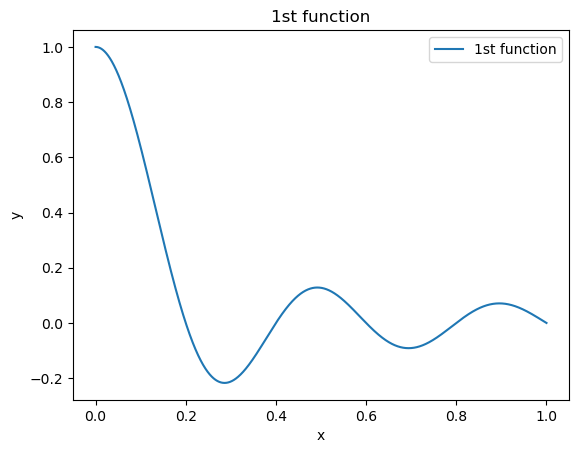

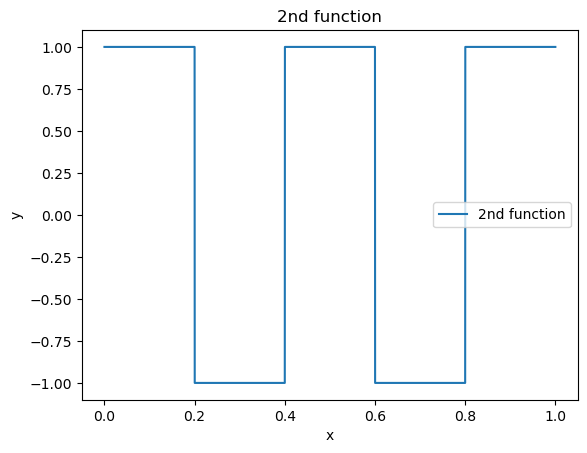

In [196]:
# define the training data and plot
x = np.linspace(2e-6, 1.0, 10000)
y1 = func1(x)
y2 = func2(x)

plt.figure()
plt.plot(x, y1, label='1st function')
plt.title('1st function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure()
plt.plot(x, y2, label='2nd function')
plt.title('2nd function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [197]:
# define the training function
def train_model(model, x_train, y_train, epochs=100, lr=0.01):

    losses = []  


    x_train_tensor = torch.tensor(x_train, dtype=torch.float32, device=device).view(-1, 1) 
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).view(-1, 1)
    


    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        outputs = model(x_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item()) 

        if (epoch+1) % 10 == 0:

            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    print('Finished Training')

    return losses

Epoch [10/20000], Loss: 0.0980
Epoch [20/20000], Loss: 0.0980
Epoch [30/20000], Loss: 0.0980
Epoch [40/20000], Loss: 0.0980
Epoch [50/20000], Loss: 0.0980
Epoch [60/20000], Loss: 0.0980
Epoch [70/20000], Loss: 0.0980
Epoch [80/20000], Loss: 0.0980
Epoch [90/20000], Loss: 0.0980
Epoch [100/20000], Loss: 0.0980
Epoch [110/20000], Loss: 0.0980
Epoch [120/20000], Loss: 0.0980
Epoch [130/20000], Loss: 0.0980
Epoch [140/20000], Loss: 0.0980
Epoch [150/20000], Loss: 0.0980
Epoch [160/20000], Loss: 0.0980
Epoch [170/20000], Loss: 0.0980
Epoch [180/20000], Loss: 0.0980
Epoch [190/20000], Loss: 0.0980
Epoch [200/20000], Loss: 0.0980
Epoch [210/20000], Loss: 0.0980
Epoch [220/20000], Loss: 0.0980
Epoch [230/20000], Loss: 0.0980
Epoch [240/20000], Loss: 0.0980
Epoch [250/20000], Loss: 0.0980
Epoch [260/20000], Loss: 0.0980
Epoch [270/20000], Loss: 0.0980
Epoch [280/20000], Loss: 0.0980
Epoch [290/20000], Loss: 0.0980
Epoch [300/20000], Loss: 0.0980
Epoch [310/20000], Loss: 0.0980
Epoch [320/20000]

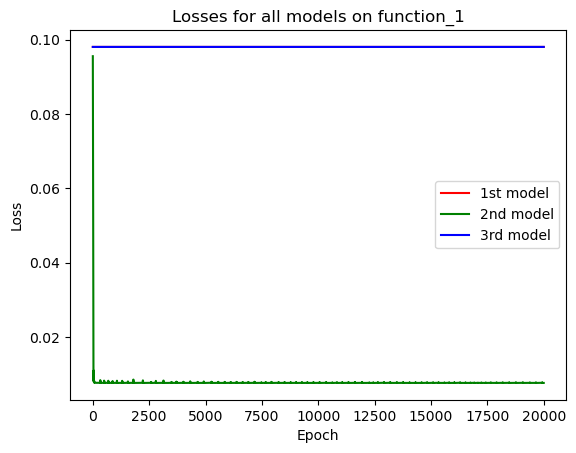

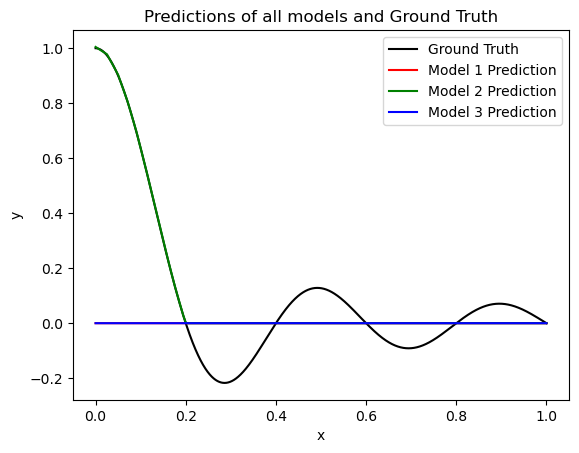

In [198]:
# train the models on function 1
# model_function

model_1_1 = Model_1()
model_2_1 = Model_2()
model_3_1 = Model_3()

model_1_1.to(device)
model_2_1.to(device)
model_3_1.to(device)


num_epochs = 20000
losses_1_1= train_model(model_1_1, x, y1, epochs=num_epochs, lr=0.01)
losses_2_1= train_model(model_2_1, x, y1, epochs=num_epochs, lr=0.01)
losses_3_1 = train_model(model_3_1, x, y1, epochs=num_epochs, lr=0.01)


plt.plot(losses_1_1, label='1st model', color = "r")
plt.plot(losses_2_1, label='2nd model', color = "g")
plt.plot(losses_3_1, label='3rd model', color = "b")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses for all models on function_1')
plt.legend()
plt.show()


predictions_1_1 = model_1_1(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()
predictions_2_1 = model_2_1(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()
predictions_3_1 = model_3_1(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()


plt.figure()
plt.plot(x, y1, label='Ground Truth', color='black')
plt.plot(x, predictions_1_1, label='Model 1 Prediction', color='r')
plt.plot(x, predictions_2_1, label='Model 2 Prediction', color='g')
plt.plot(x, predictions_3_1, label='Model 3 Prediction', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions of all models and Ground Truth')
plt.legend()
plt.show()


Epoch [10/20000], Loss: 0.0980
Epoch [20/20000], Loss: 0.0980
Epoch [30/20000], Loss: 0.0980
Epoch [40/20000], Loss: 0.0980
Epoch [50/20000], Loss: 0.0980
Epoch [60/20000], Loss: 0.0980
Epoch [70/20000], Loss: 0.0980
Epoch [80/20000], Loss: 0.0980
Epoch [90/20000], Loss: 0.0980
Epoch [100/20000], Loss: 0.0980
Epoch [110/20000], Loss: 0.0980
Epoch [120/20000], Loss: 0.0980
Epoch [130/20000], Loss: 0.0980
Epoch [140/20000], Loss: 0.0980
Epoch [150/20000], Loss: 0.0980
Epoch [160/20000], Loss: 0.0980
Epoch [170/20000], Loss: 0.0980
Epoch [180/20000], Loss: 0.0980
Epoch [190/20000], Loss: 0.0980
Epoch [200/20000], Loss: 0.0980
Epoch [210/20000], Loss: 0.0980
Epoch [220/20000], Loss: 0.0980
Epoch [230/20000], Loss: 0.0980
Epoch [240/20000], Loss: 0.0980
Epoch [250/20000], Loss: 0.0980
Epoch [260/20000], Loss: 0.0980
Epoch [270/20000], Loss: 0.0980
Epoch [280/20000], Loss: 0.0980
Epoch [290/20000], Loss: 0.0980
Epoch [300/20000], Loss: 0.0980
Epoch [310/20000], Loss: 0.0980
Epoch [320/20000]

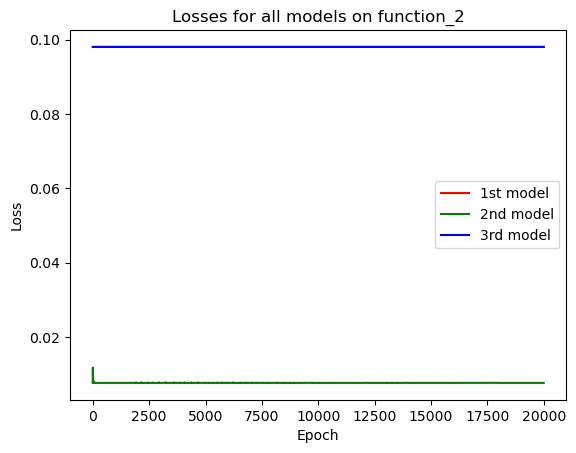

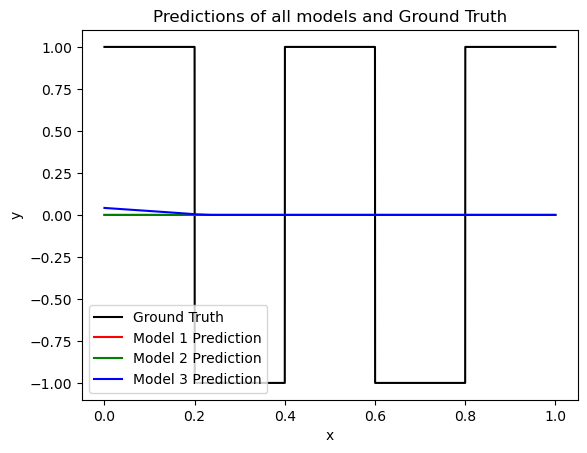

In [199]:
# train the models on function 2

model_1_2 = Model_1()
model_2_2 = Model_2()
model_3_2 = Model_3()

model_1_2.to(device)
model_2_2.to(device)
model_3_2.to(device)

losses_1_2= train_model(model_1_1, x, y1, epochs=num_epochs, lr=0.01)
losses_2_2= train_model(model_2_1, x, y1, epochs=num_epochs, lr=0.01)
losses_3_2 = train_model(model_3_1, x, y1, epochs=num_epochs, lr=0.01)


plt.plot(losses_1_2, label='1st model', color = "r")
plt.plot(losses_2_2, label='2nd model', color = "g")
plt.plot(losses_3_2, label='3rd model', color = "b")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses for all models on function_2')
plt.legend()
plt.show()


predictions_1_2 = model_1_2(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()
predictions_2_2 = model_2_2(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()
predictions_3_2 = model_3_2(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()


plt.figure()
plt.plot(x, y2, label='Ground Truth', color='black')
plt.plot(x, predictions_1_2, label='Model 1 Prediction', color='r')
plt.plot(x, predictions_2_2, label='Model 2 Prediction', color='g')
plt.plot(x, predictions_3_2, label='Model 3 Prediction', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions of all models and Ground Truth')
plt.legend()
plt.show()
